In [327]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import math

In [328]:
expected_ps = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
n = 100000
expected_vals = expected_ps * n
trial_results = np.asarray([0] * 6)

In [329]:
desired_steals_per_thousand = 8
total_bias = 0
for i in range(n):
    fair_roll_result = rand.randint(1, 6)
    if(i % 1000 < desired_steals_per_thousand) :  # add some bias steal a result for a 3 here and there
        roll_result = 3
        if(roll_result != fair_roll_result) : total_bias+=1
    else : 
        roll_result = fair_roll_result
    trial_results[roll_result-1]+=1


print((total_bias/n) * 100, "% of rolls were stolen for 3")



0.6819999999999999 % of rolls were stolen for 3


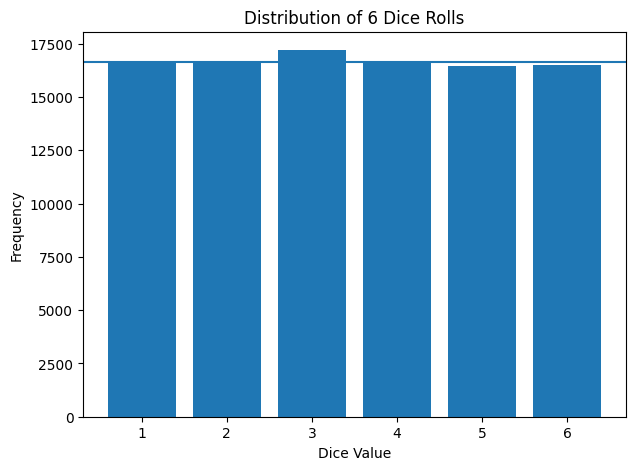

In [330]:
x = [1, 2, 3, 4, 5, 6]
plt.figure(figsize=[7,5])
plt.bar(x, trial_results)
plt.axhline(expected_vals[0])
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.title('Distribution of 6 Dice Rolls')
plt.show()

trial results  [16633 16602 17207 16581 16471 16506]
expected values [16666.66666667 16666.66666667 16666.66666667 16666.66666667
 16666.66666667 16666.66666667]
std devs [117.8511302 117.8511302 117.8511302 117.8511302 117.8511302 117.8511302]
normalised results [-0.28567114 -0.54871486  4.58488037 -0.72690577 -1.66028672 -1.36330187]


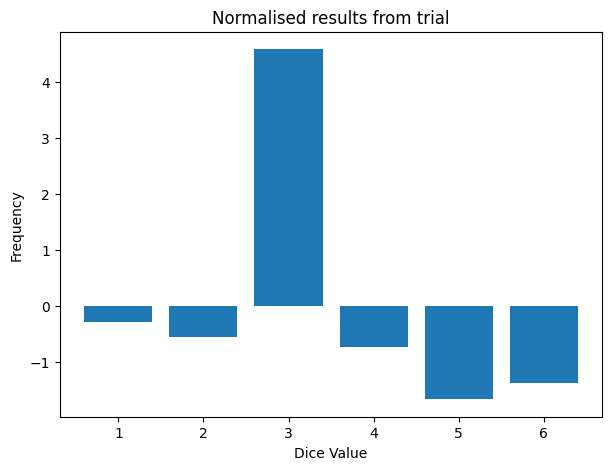

In [331]:
variances = np.array([n*p*(1-p) for p in expected_ps])
std_devs = np.sqrt(variances)
normalised_results = ((trial_results - expected_vals)/std_devs)

print("trial results ", trial_results)
print("expected values", expected_vals)
print("std devs", std_devs)
print("normalised results", normalised_results)

x = [1, 2, 3, 4, 5, 6]
plt.figure(figsize=[7,5])
plt.bar(x, normalised_results)
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.title('Normalised results from trial')
plt.show()


In [332]:
chi_sq = ((trial_results - expected_vals)**2/expected_vals) 
chi_sq_statistic = np.sum(chi_sq)

print("chi square val ", chi_sq)
print("chi square statistic ", chi_sq_statistic)

chi square val  [ 0.06800667  0.25090667 17.51760667  0.44032667  2.29712667  1.54882667]
chi square statistic  22.122800000000005


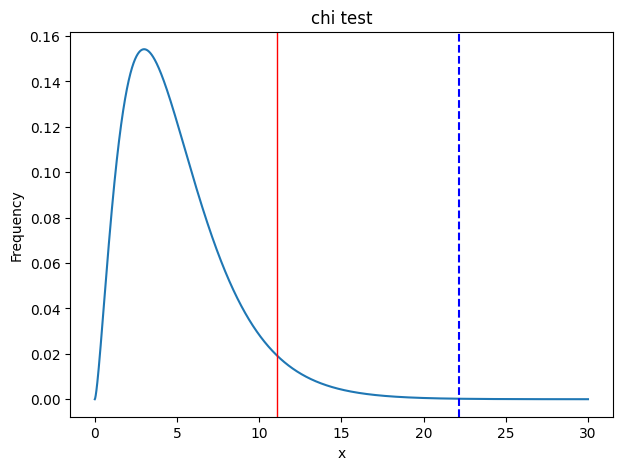

In [333]:
from scipy.stats import chi2
x = np.arange(0, 30, 0.001)

critical_region = chi2.ppf(1-.05, df=5)

plt.figure(figsize=[7,5])
plt.plot(x, chi2.pdf(x, df=5))
plt.axvline(chi_sq_statistic, color='blue', ls='--')
plt.axvline(critical_region, color='red', lw=1, label="critical region")
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('chi test')
plt.show()